In [2]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)


tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


In [4]:
x + x


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [6]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [10]:
x @ tf.transpose(x)


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [11]:
tf.concat([x, x, x], axis=0)


<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [12]:
tf.nn.softmax(x, axis=-1)


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [13]:
tf.reduce_sum(x)


<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [14]:
tf.convert_to_tensor([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [15]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")


TensorFlow **IS NOT** using the GPU


In [16]:
var = tf.Variable([0.0, 0.0, 0.0])


In [17]:
var.assign([1, 2, 3])


<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [18]:
var.assign_add([1, 1, 1])


<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [19]:
x = tf.Variable(1.0)


def f(x):
  y = x**2 + 2*x - 5
  return y


In [20]:
f(x)


<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

In [21]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x


<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [29]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)


In [30]:
x = tf.constant([1, 2, 3])
my_func(x)


Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [31]:
x = tf.constant([10, 9, 8])
my_func(x)


<tf.Tensor: shape=(), dtype=int32, numpy=27>

In [32]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)


Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

In [33]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight


In [34]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

In [36]:
save_path = './saved'
tf.saved_model.save(mod, save_path)


INFO:tensorflow:Assets written to: ./saved\assets


In [37]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

In [39]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]


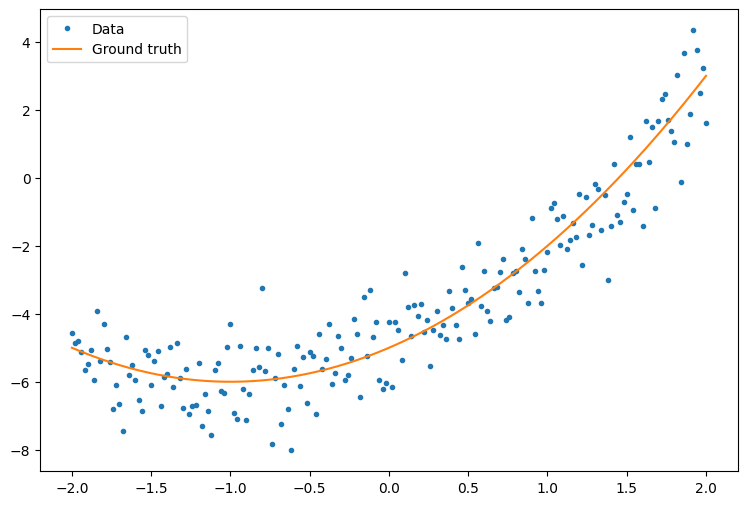

In [40]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)


def f(x):
  y = x**2 + 2*x - 5
  return y


y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend()


In [41]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])

  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b


In [42]:
quad_model = Model()


In [43]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()


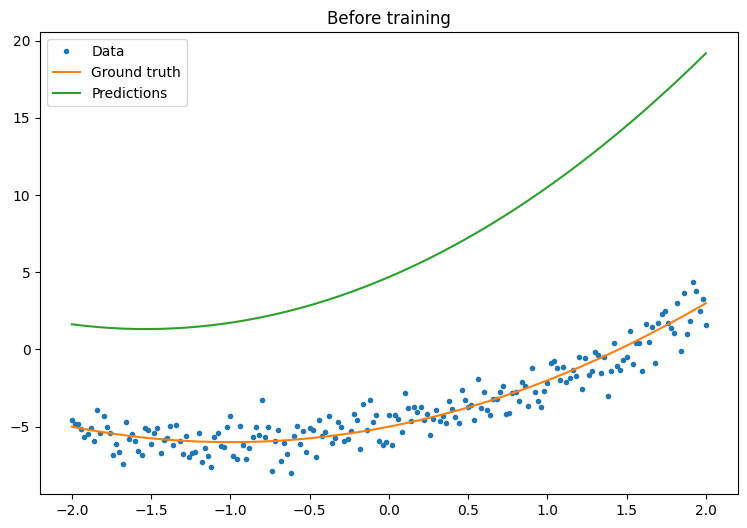

In [44]:
plot_preds(x, y, f, quad_model, 'Before training')


In [45]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))


In [46]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)


Mean squared error for step 0: 56.795
Mean squared error for step 10: 9.398
Mean squared error for step 20: 3.801
Mean squared error for step 30: 1.871
Mean squared error for step 40: 1.184
Mean squared error for step 50: 0.944
Mean squared error for step 60: 0.856
Mean squared error for step 70: 0.826
Mean squared error for step 80: 0.815
Mean squared error for step 90: 0.811




Text(0.5, 1.0, 'MSE loss vs training iterations')

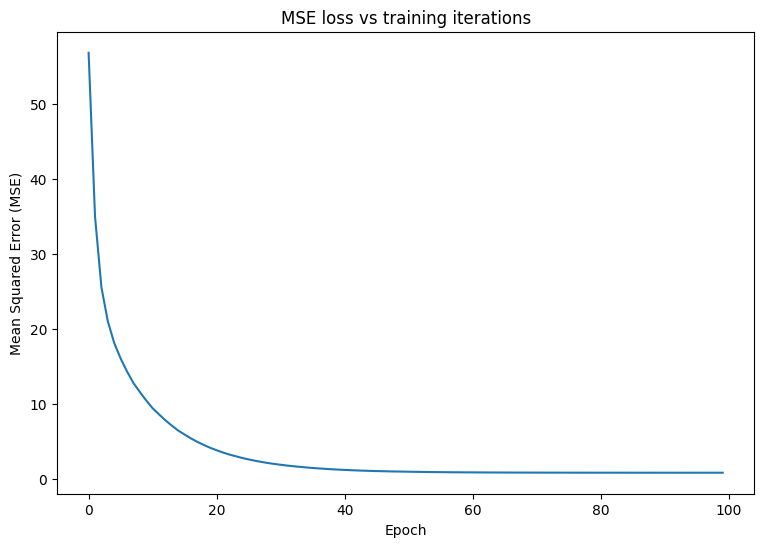

In [47]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g, v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations')


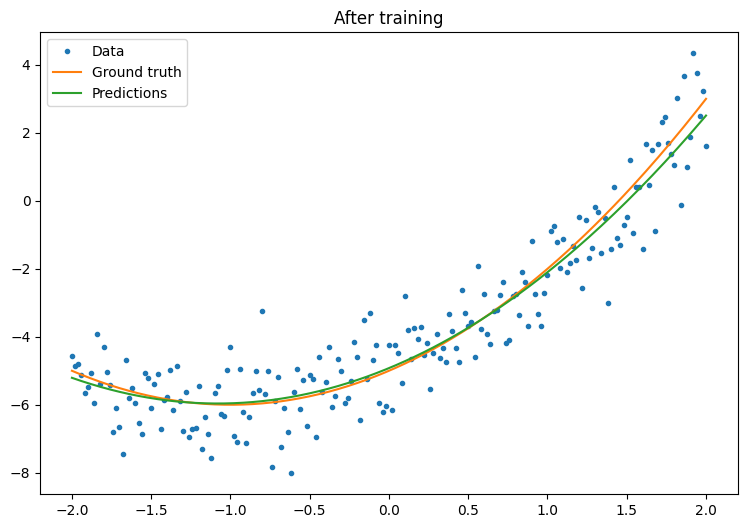

In [48]:
plot_preds(x, y, f, quad_model, 'After training')


In [49]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])


In [50]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('./my_new_model')


INFO:tensorflow:Assets written to: ./my_new_model\assets


Text(0.5, 1.0, 'Keras training progress')

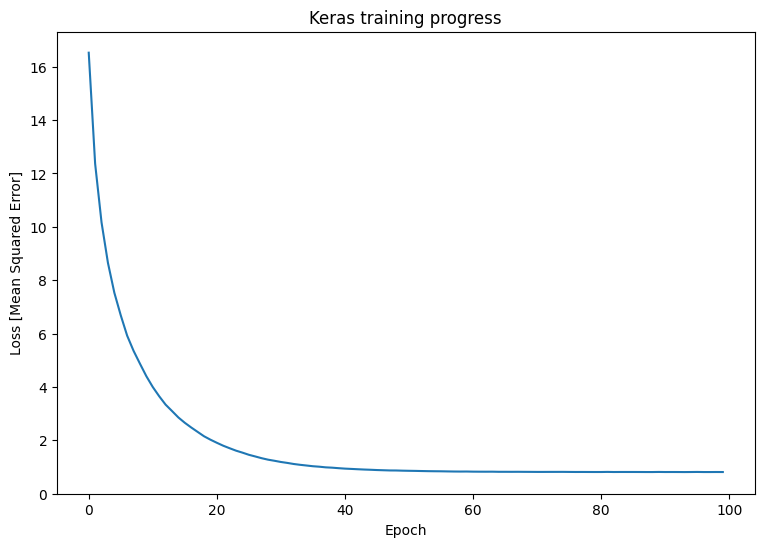

In [51]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress')


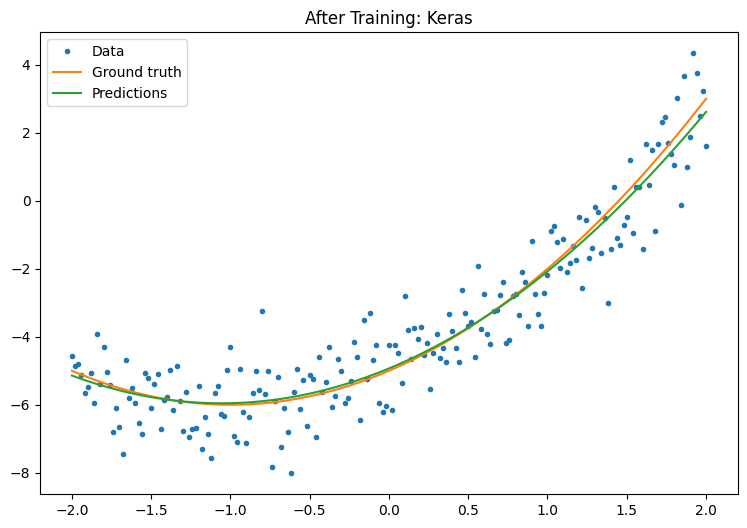

In [52]:
plot_preds(x, y, f, new_model, 'After Training: Keras')
